# Day 10 - Mongo DB

在 docker 安裝 mongodb

$sudo docker pull mongo:latest

$sudo docker image

使用以下命令來運行 mongo 容器：
$docker run -itd --name mongo -p 27017:27017 mongo --auth

參數說明：
(1)-p 27017:27017 ：映射容器服務的 27017 埠到宿主機的 27017 埠。外部可以直接通過主機 ip:27017 訪問到 mongo 的服務。
(2)--auth：需要密碼才能訪問容器服務。
#確認執行的Docker 程式

$docker ps

$ docker exec -it mongo mongo admin 
# 創建一個名為 admin，密碼為 123456 的用戶。 
db.createUser({ user:‘admin’,pwd:‘123456‘, roles:[ { role:'userAdminAnyDatabase', db: 'admin’},
"readWriteAnyDatabase"]}); 
# 嘗試使用上面創建的使用者資訊進行連接。
 > db.auth('admin', '123456') 

輸入，就可以進入容器內 
$ docker exec -it mongo4 bash
能用 mongo 指令，連入資料庫 
#更新源 
$apt-get update 
#安裝編輯器 
$vim apt-get install vim 
#修改 mongo 設定檔 
$vim /etc/mongod.conf.orig


# 進入 admin 的資料庫 
use admin 

# 創建管理員用戶 

db.createUser( { 
user: "admin", 
pwd: "123456", 
roles: [ { role: "userAdminAnyDatabase", db: "admin" } ] 
} ) 

#創建有可讀寫許可權的用戶. 對於一個特定的資料庫, 比如'demo’ 
db.createUser({ 
user: 'test’, 
pwd: '123456’, 
roles: [{role: "read", db: "demo"}] 
})



# Dockfile 


#MongoDB Dockerfile
#https://github.com/dockerfile/mongodb


#Pull base image.
FROM dockerfile/ubuntu

#Install MongoDB.
RUN \
  apt-key adv --keyserver hkp://keyserver.ubuntu.com:80 --recv 7F0CEB10 && \
  echo 'deb http://downloads-distro.mongodb.org/repo/ubuntu-upstart dist 10gen' > /etc/apt/sources.list.d/mongodb.list && \
  apt-get update && \
  apt-get install -y mongodb-org && \
  rm -rf /var/lib/apt/lists/*

#Define mountable directories.
VOLUME ["/data/db"]

#Define working directory.
WORKDIR /data

#Define default command.
CMD ["mongod"]

#Expose ports.
#- 27017: process
#- 28017: http
EXPOSE 27017
EXPOSE 28017

# Usage Reference

#Run mongod

   docker run -d -p 27017:27017 --name mongodb dockerfile/mongodb

#Run mongod w/ persistent/shared directory

   docker run -d -p 27017:27017 -v <db-dir>:/data/db --name mongodb dockerfile/mongodb

#Run mongod w/ HTTP support

    docker run -d -p 27017:27017 -p 28017:28017 --name mongodb dockerfile/mongodb mongod --rest --httpinterface

#Run mongod w/ Smaller default file size

    docker run -d -p 27017:27017 --name mongodb dockerfile/mongodb mongod --smallfiles

#Run mongo

    docker run -it --rm --link mongodb:mongodb dockerfile/mongodb bash -c 'mongo --host mongodb'

#Usage with VirtualBox (boot2docker-vm)

    You will need to set up nat port forwarding with:

VBoxManage 
    
    modifyvm "boot2docker-vm" --natpf1 "guestmongodb,tcp,127.0.0.1,27017,,27017"
    
This will allow you to connect to your mongo container with the standard mongo commands.

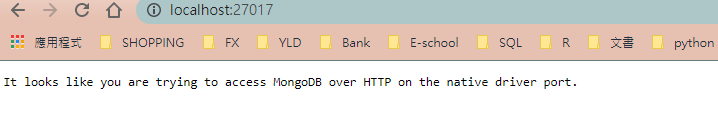